In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_csv('airline_passengers.csv')
data = raw_data.copy()

In [3]:
data.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
data.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
data = data.drop(144, axis=0)

In [6]:
data.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [7]:
data.columns = ['ds', 'y']
data.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


<AxesSubplot:>

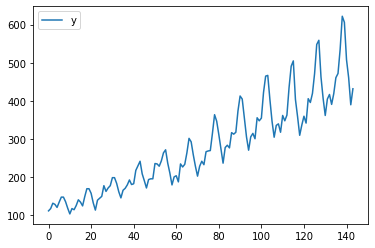

In [8]:
data.plot()            #TimeSeries Data

In [9]:
data['ds'] = pd.to_datetime(data['ds'])

In [10]:
from fbprophet import Prophet

In [11]:
model = Prophet()

In [12]:
data.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [13]:
model.fit(data)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

### The Algorithm recognized it is yearly distributed TimeSeries data, so it turned off the weekly and daily seasonality

In [15]:
future_dates = model.make_future_dataframe(periods=365)

In [16]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [17]:
data.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [18]:
predictions = model.predict(future_dates)

In [19]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.763021,55.259061,112.577850,106.763021,106.763021,-21.935881,-21.935881,-21.935881,-21.935881,-21.935881,-21.935881,0.0,0.0,0.0,84.827140
1,1949-02-01,108.935527,50.315777,107.928475,108.935527,108.935527,-30.689957,-30.689957,-30.689957,-30.689957,-30.689957,-30.689957,0.0,0.0,0.0,78.245570
2,1949-03-01,110.897791,81.945894,140.515022,110.897791,110.897791,-0.502721,-0.502721,-0.502721,-0.502721,-0.502721,-0.502721,0.0,0.0,0.0,110.395070
3,1949-04-01,113.070297,80.033936,137.414526,113.070297,113.070297,-5.177145,-5.177145,-5.177145,-5.177145,-5.177145,-5.177145,0.0,0.0,0.0,107.893153
4,1949-05-01,115.172723,81.860219,140.576238,115.172723,115.172723,-3.771357,-3.771357,-3.771357,-3.771357,-3.771357,-3.771357,0.0,0.0,0.0,111.401366


### yhat is the original output that we need! yhat_lower and upper gets us the trend

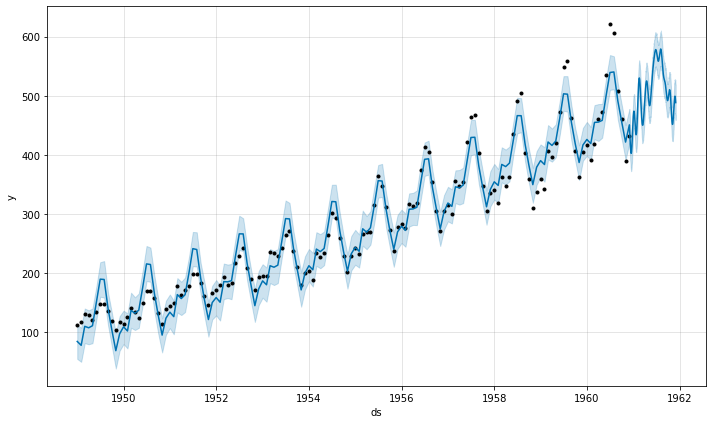

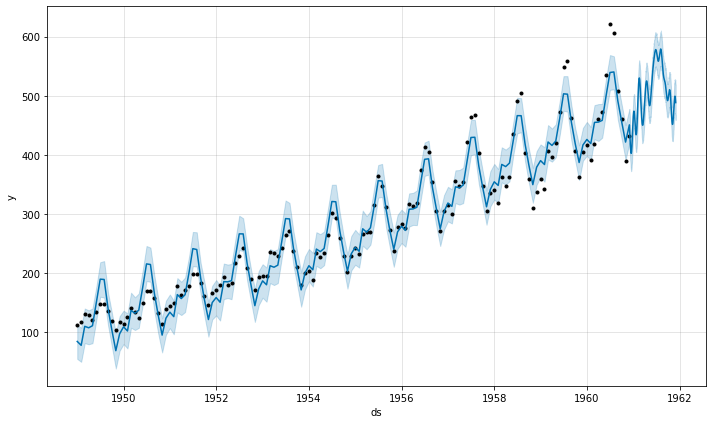

In [20]:
model.plot(predictions)

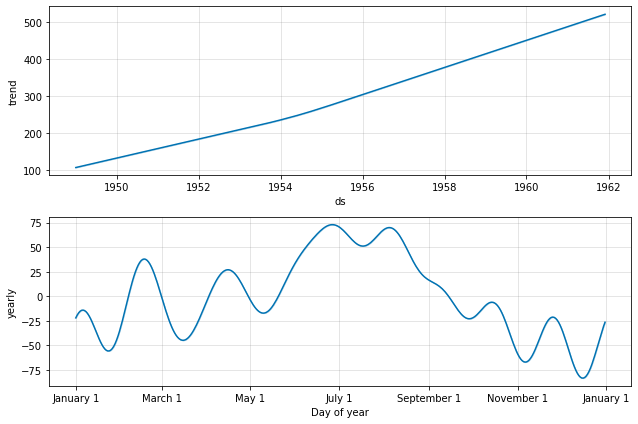

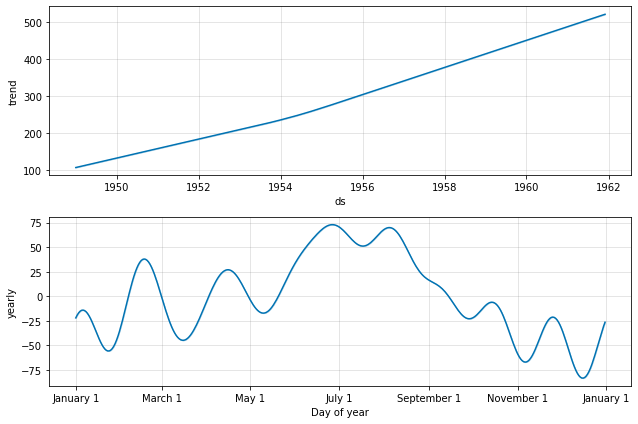

In [21]:
model.plot_components(predictions)

In [22]:
from fbprophet.diagnostics import cross_validation

data_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [23]:
data_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,159.442916,159.117319,159.840754,150.0,1951-01-18
1,1951-03-01,172.072908,170.983979,173.203065,178.0,1951-01-18
2,1951-04-01,158.439108,156.179953,160.843940,163.0,1951-01-18
3,1951-05-01,142.884028,139.197782,146.700531,172.0,1951-01-18
4,1951-06-01,175.806867,170.500716,181.323116,178.0,1951-01-18


In [24]:
from fbprophet.diagnostics import performance_metrics

data_per = performance_metrics(data_cv)
data_per.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1092.994523,33.060468,26.040774,0.079380,0.074178,0.227273
1,42 days,1018.230083,31.909718,25.353268,0.077486,0.074178,0.181818
2,46 days,915.539058,30.257876,24.856413,0.079819,0.084510,0.136364
3,47 days,1053.224624,32.453422,26.965431,0.082392,0.085710,0.136364
4,48 days,1041.995411,32.279954,26.376037,0.080289,0.085710,0.181818


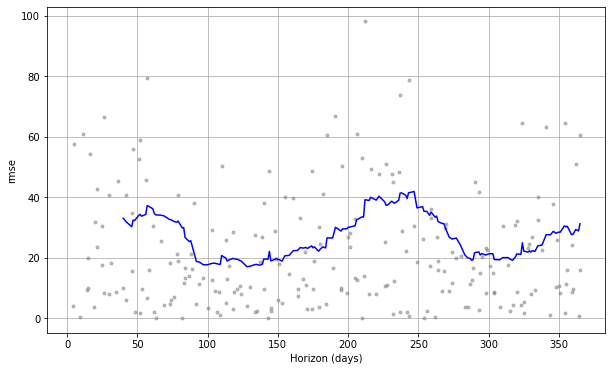

In [25]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(data_cv, metric='rmse')

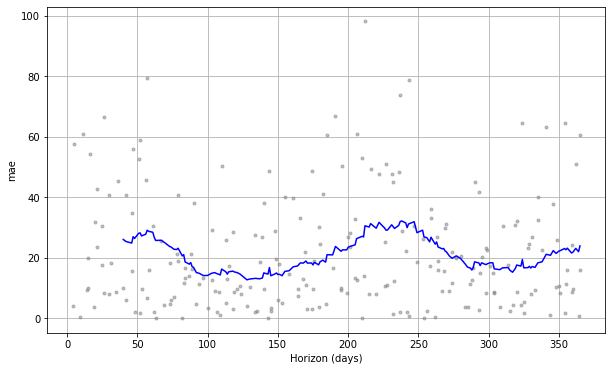

In [26]:
fig = plot_cross_validation_metric(data_cv, metric='mae')

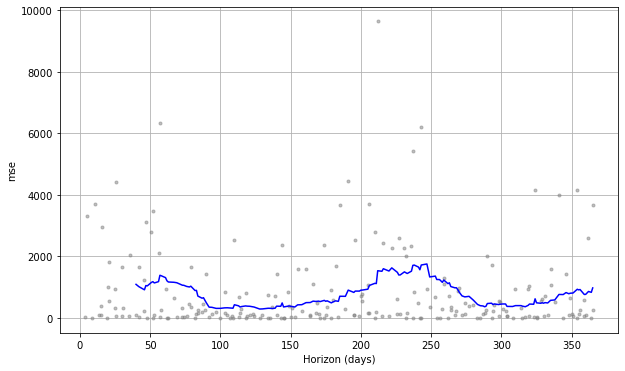

In [27]:
fig = plot_cross_validation_metric(data_cv, metric='mse')